In [13]:
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, ElasticNet
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, accuracy_score, precision_score, f1_score, mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

np.random.seed(42)

import time
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Group 2:

Names of Group members: Chukwuma Frank Chukwuemeka; Mutthu Annamalai; Supratim Basu.

In [14]:
EnergyData = pd.read_csv('energydata_complete.csv')

In [15]:
#Data Preprocessing
def myPreProc(EnergyData):
    procData = EnergyData.dropna(how = 'all', axis = 1, inplace = False)
    procData = procData.dropna() 
    procData['Power'] = procData['Appliances'].astype(int) + procData['lights'].astype(int)
    procData = procData.drop('Appliances', axis = 1);
    procData = procData.drop('lights', axis = 1);
    procData = procData.drop('date', axis = 1);
    procData = procData.drop(['rv1', 'rv2'],axis=1)
    return procData

In [16]:
procData = myPreProc(EnergyData)

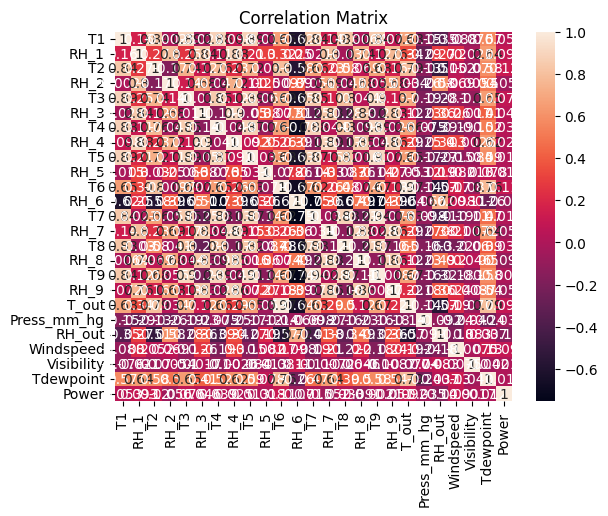

In [23]:
# Plot a correlation matrix
corr = procData.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [17]:
X = procData.drop('Power', axis=1)
y = procData['Power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

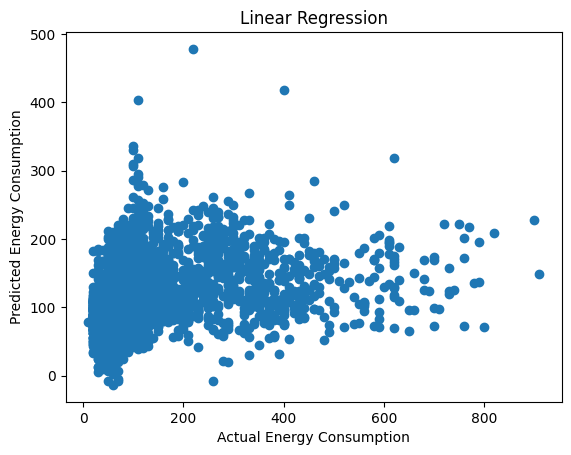

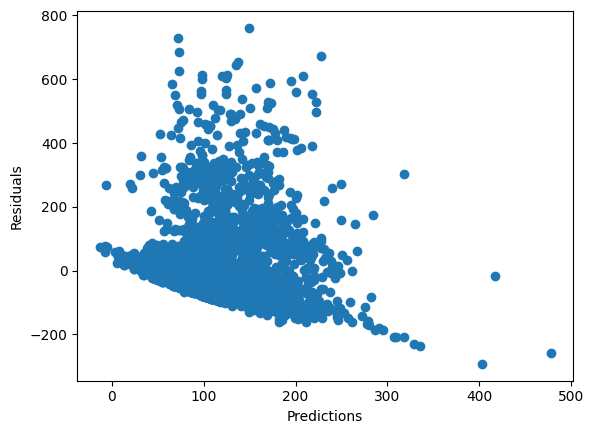

MSE: 9005.636162461997
RMSE: 94.89803034026573
MAE: 54.96886852124224
Trianing R2 score is: 0.15246238606207907
Test R2 score is: 0.15669888703206492
Execution time is: 25.059938430786133


In [18]:
#Linear Regression

#Standardizing the input features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Calculating the training and testing time of our model
start_time = time.time()
Lr_model = LinearRegression()
Lr_model.fit(X_train_scaled, y_train)


ypred1_train = Lr_model.predict(X_train_scaled)
y_pred_lr = Lr_model.predict(X_test_scaled)
end_time = time.time()
exec_time = (end_time - start_time) * 1000

#Evaluating the model performance using the metrics
train_R2 = r2_score(y_train, ypred1_train)
test_R2 = r2_score(y_test, y_pred_lr)
mse1 = mean_squared_error(y_test, y_pred_lr)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(y_test,y_pred_lr)
r2_score_lr = r2_score(y_test, y_pred_lr)

# Plot the predicted values vs. the true values
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('Linear Regression')
plt.show()

# Plot the residuals
plt.scatter(y_pred_lr, y_test - y_pred_lr)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

print("MSE:", mse1)
print("RMSE:", rmse1)
print("MAE:", mae1)
print('Trianing R2 score is:',train_R2 )
print('Test R2 score is:',r2_score_lr )
print('Execution time is:', exec_time)

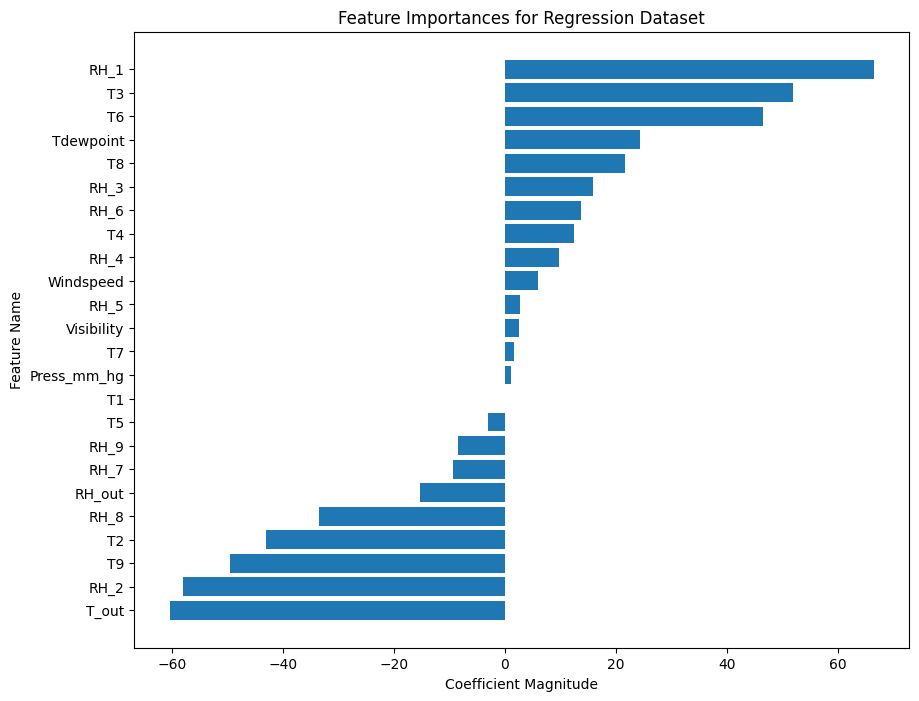

In [19]:
#obtaining the feature importance of the linear regression model
importances = Lr_model.coef_
# sort the feature importances in ascending order
sorted_idx = np.argsort(importances)

feature_names = X_train.columns.tolist()

# convert the feature names list to a NumPy array
feature_names = np.array(feature_names)

# plot the feature importances in ascending order
plt.figure(figsize=(10, 8))
plt.barh(range(X_train.shape[1]), importances[sorted_idx])
plt.yticks(range(X_train.shape[1]), feature_names[sorted_idx])
plt.title("Feature Importances for Regression Dataset")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature Name")
plt.show()

In [20]:
#Removing features that have the lowest impact on the Linear Regression model
Lreg_procData = procData.drop(['T_out', 'RH_2', 'T9', 'T2'],axis=1)

X2 = Lreg_procData.drop('Power', axis=1)
y2 = Lreg_procData['Power']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

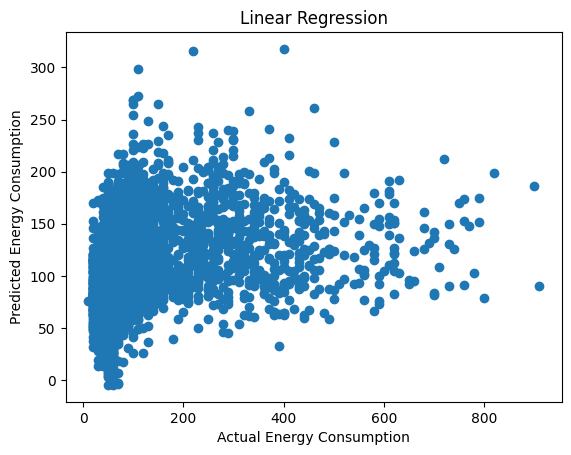

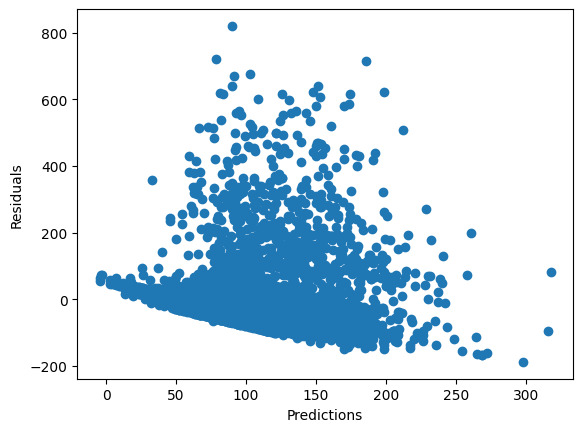

MSE: 9392.921347873811
RMSE: 96.91708491217537
MAE: 56.676649762845244
Test R2 score is: 0.1204329284699005
Train R2 score is: 0.1228451257032197
Execution time is: 101.7911434173584


In [21]:
#standardizing the input features
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

Lreg1_model = LinearRegression()

#Calculating the model training and testing time
start5_time = time.time()
Lreg1_model.fit(X2_train_scaled, y2_train)


y2_pred_lr = Lreg1_model.predict(X2_test_scaled)
end5_time = time.time()
exec5_time = (end5_time - start5_time) * 1000

y2pred_train = Lreg1_model.predict(X2_train_scaled)
train2_R2 = r2_score(y_train, y2pred_train)

#Evaluating the model performance
test_R2 = r2_score(y2_test, y2_pred_lr)
mse5 = mean_squared_error(y2_test, y2_pred_lr)
rmse5 = np.sqrt(mse5)
mae5 = mean_absolute_error(y2_test,y2_pred_lr)
r2_score_lr2 = r2_score(y2_test, y2_pred_lr)

# Plot the predicted values vs. the true values
plt.scatter(y2_test, y2_pred_lr)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('Linear Regression')
plt.show()

# Plot the residuals
plt.scatter(y2_pred_lr, y2_test - y2_pred_lr)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

print("MSE:", mse5)
print("RMSE:", rmse5)
print("MAE:", mae5)
print('Test R2 score is:',r2_score_lr2 )
print('Train R2 score is:',train2_R2 )
print('Execution time is:', exec5_time)

As can be seen above, feature importance selection hyper parameter tuning did not go well as the model performed poorly compared to the original metric values. We pondered about this and thought of overfitting being the problem, but we checked and see the values of the trainig score and the testing score are almost the same which is an indication that the model is generalizing well to the testing data. We also thought that the feature we have removed based on the importance score could actually have significant impact on the model. Hence we resorted to using a different approach to tune the model, which Grid search, while specifically tuning the regularization strength parameter, alpha, for ridge regression.

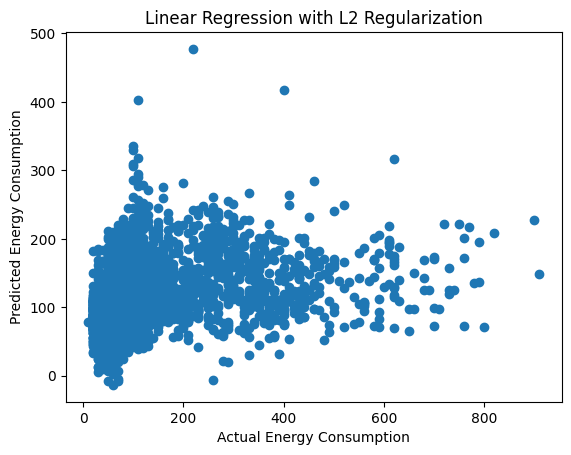

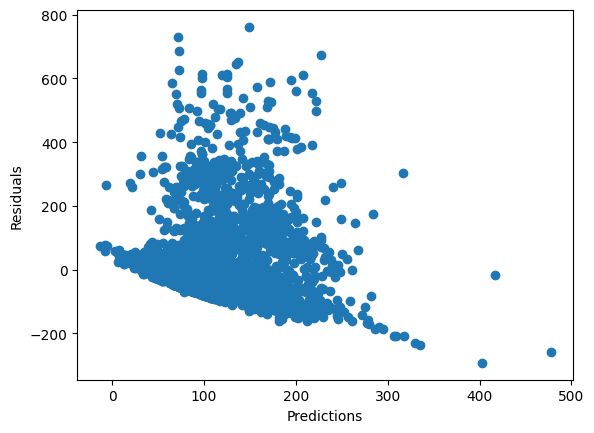

MSE: 9005.70690715923
RMSE: 94.89840308013213
MAE: 54.96315230232597
Test R2 score is: 0.15669226239380096
Execution time is: 3.920316696166992


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a pipeline that includes scaling and regularization
pipeline = make_pipeline(
    StandardScaler(),
    Ridge()
)

# Define the range of regularization parameter values to try
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Use Grid Search to find the best value of the regularization parameter
grid_search_Lr= GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_Lr.fit(X_train_scaled, y_train)

# Fit the model with the best regularization parameter found by Grid Search
best_model = grid_search_Lr.best_estimator_
best_model.fit(X_train_scaled, y_train)

start4_time = time.time()
ypred4_train = best_model.predict(X_train_scaled)
y_pred4_lr = best_model.predict(X_test_scaled)
end4_time = time.time()
exec4_time = (end4_time - start4_time) * 1000

test4_R2 = r2_score(y_test, y_pred4_lr)
mse4 = mean_squared_error(y_test, y_pred4_lr)
rmse4 = np.sqrt(mse4)
mae4 = mean_absolute_error(y_test,y_pred4_lr)
r2_score_lr1 = r2_score(y_test, y_pred4_lr)

# Plot the predicted values vs. the true values
plt.scatter(y_test, y_pred4_lr)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('Linear Regression with L2 Regularization')
plt.show()

# Plot the residuals
plt.scatter(y_pred4_lr, y_test - y_pred4_lr)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

print("MSE:", mse4)
print("RMSE:", rmse4)
print("MAE:", mae4)
print('Test R2 score is:',r2_score_lr1 )
print('Execution time is:', exec4_time)

we have used Gridsearch hyperparameter tuning to tune the linear regression model by specifically tuning the regularization strength parameter (alpha) for Ridge Regression. But we are still getting the same result like the original result. We will proceed to the next step by increasing the search space to see if we can have an improvement.

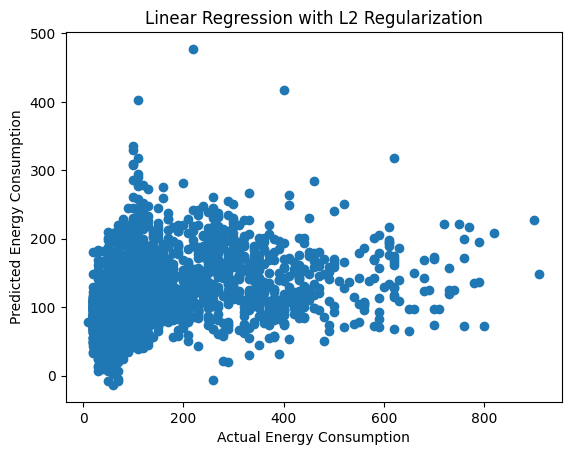

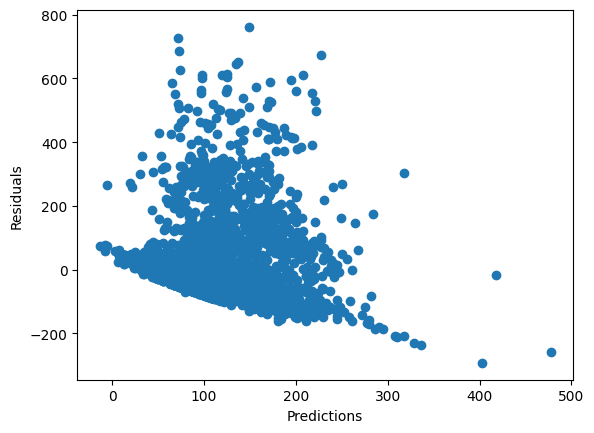

MSE: 9005.542368102757
RMSE: 94.89840308013213
MAE: 54.94802943838835
Test R2 score is: 0.15670767007482944
Execution time is: 4.334926605224609


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a pipeline that includes scaling and regularization
pipeline3 = make_pipeline(
    StandardScaler(),
    Ridge()
)

# Define the range of regularization parameter values to try
param_dist3 = {
    'ridge__alpha': np.logspace(-4, 4, 1000),
    'ridge__max_iter': [100, 500, 1000, 5000],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Use Randomized Search to find the best value of the regularization parameter
random_search_Lr2 = RandomizedSearchCV(pipeline3, param_distributions=param_dist3, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_Lr2.fit(X_train_scaled, y_train)

# Fit the model with the best regularization parameter found by Randomized Search
best_model3 = random_search_Lr2.best_estimator_
best_model3.fit(X_train_scaled, y_train)

start4_time3 = time.time()
ypred4_train3 = best_model3.predict(X_train_scaled)
y_pred4_lr3 = best_model3.predict(X_test_scaled)
end4_time3 = time.time()
exec4_time3 = (end4_time3 - start4_time3) * 1000

test4_R3 = r2_score(y_test, y_pred4_lr3)
mse4_3 = mean_squared_error(y_test, y_pred4_lr3)
rmse4_3 = np.sqrt(mse4)
mae4_3 = mean_absolute_error(y_test,y_pred4_lr3)
r2_score_lr1_3 = r2_score(y_test, y_pred4_lr3)

# Plot the predicted values vs. the true values
plt.scatter(y_test, y_pred4_lr3)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('Linear Regression with L2 Regularization')
plt.show()

# Plot the residuals
plt.scatter(y_pred4_lr3, y_test - y_pred4_lr3)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

print("MSE:", mse4_3)
print("RMSE:", rmse4_3)
print("MAE:", mae4_3)
print('Test R2 score is:',r2_score_lr1_3 )
print('Execution time is:', exec4_time3)

we tried to increase the search space and even changed the GridSearchCV to randomizedSearchCV as can be seen in the above code but there was still no improvement in the metric results. We can say that the data might not contain enough information to improve the model performance. Based on our research and understanding of how hyperparameter tuning works, even if there is no significant improvement in the model performance, tuning hyperparameters can still be helpful in terms of improving the model's robustness and stability.